# Requisitos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD

# Cargada de datos

In [26]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

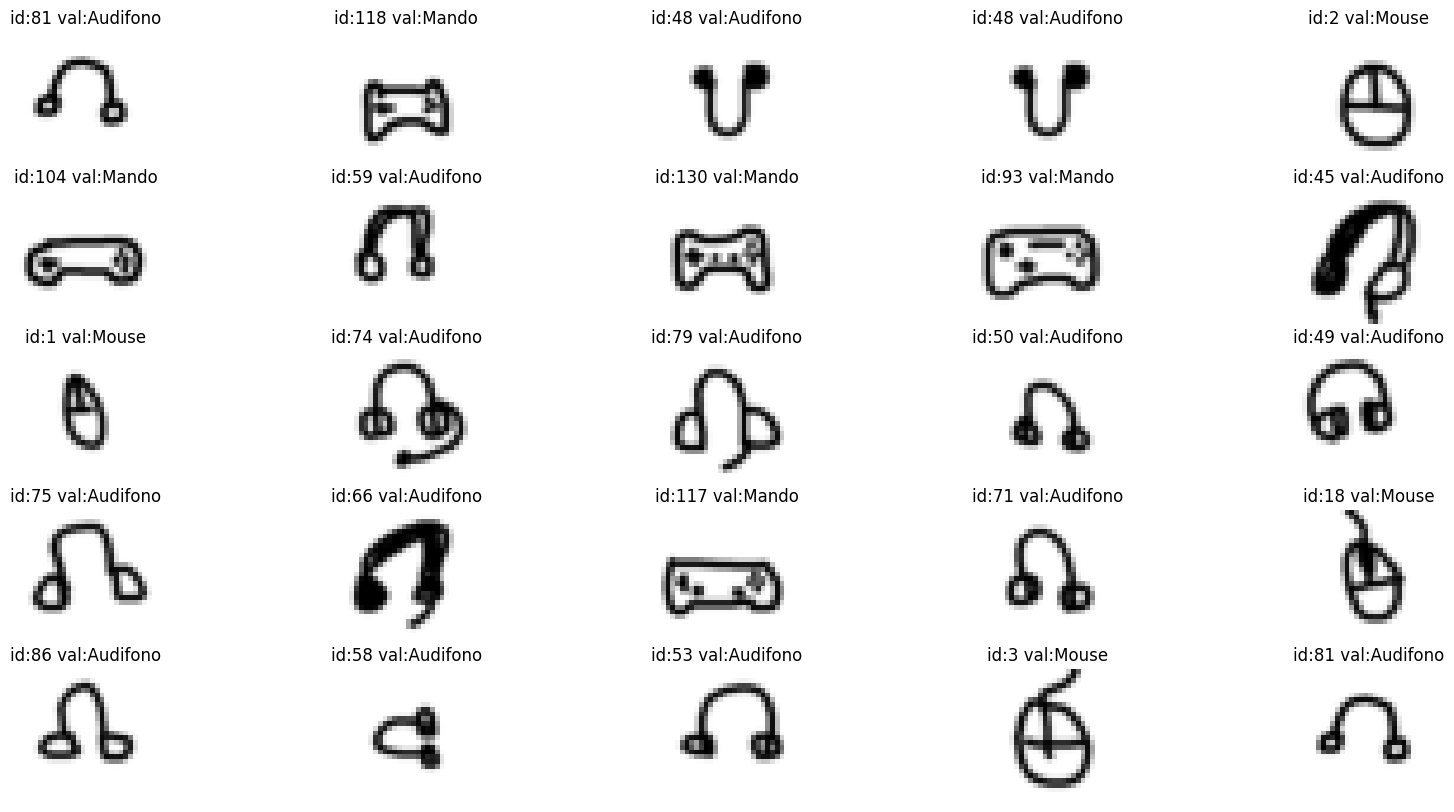

In [27]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

In [28]:
X.shape

(134, 28, 28)

In [29]:
y.shape

(134,)

# Entrenamiento del modelo

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[..., None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(107, 28, 28, 1) (27, 28, 28, 1)


In [66]:
bs = 16
lr = 0.0001
# ["Mouse", "Audifono", "Mando"];
class_mapping = {"Mouse": 0, "Audifono": 1, "Mando": 2}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential(
    [
        Conv2D(32, 3, activation="relu", input_shape=(*size, 1)),
        MaxPool2D(),
        Conv2D(64, 3, activation="relu", padding="same"),
        MaxPool2D(),
        Conv2D(128, 3, activation="relu", padding="same"),
        MaxPool2D(),
        Flatten(),
        Dense(128, activation="relu"),  # modificar!
        Dense(64, activation="relu"),  # modificar!
        Dense(3, activation="softmax"),
    ]
)  # no modificar

In [67]:
optimizer1 = SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 3, 3, 128)        

In [ ]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=5000, validation_data=(X_test, y_test))
model.save('modelo_entrenado.h5')

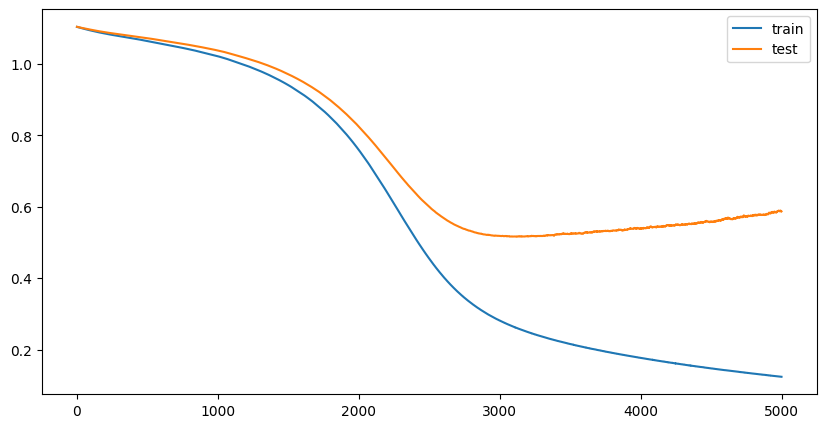

In [69]:
# Make a graph of the train loss
plt.figure(figsize=(10, 5))
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='test')
plt.legend()
plt.show()


# Probando el modelo

In [70]:
#Probando modelo
etiquetas = {0: "Mouse", 1: "Audifono", 2: "Mando"}

In [71]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombres = etiquetas.get(label, 'Desconocida')

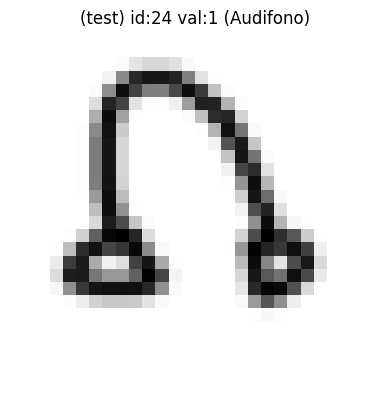

In [72]:
plt.title('(test) id:{} val:{} ({})'.format(idx, label, nombres))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()


In [73]:
#Usando el modelo
salida = model.predict(im[None,:,:,:])[0]

1/1 [==============================] - 0s 73ms/step


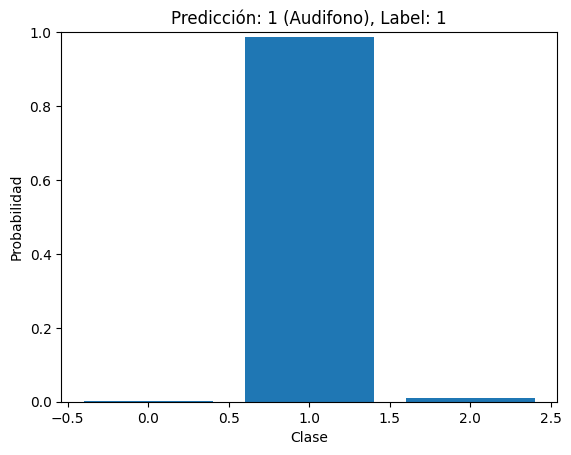

In [74]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), nombres, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()